# Plotting with ggplot - the plotnine package



ggplot is a system for declaratively creating graphics, based on [The Grammar of Graphics](https://towardsdatascience.com/a-comprehensive-guide-to-the-grammar-of-graphics-for-effective-visualization-of-multi-dimensional-1f92b4ed4149). You provide the data, tell ggplot how to map variables to aesthetics, what graphical primitives to use, and it takes care of the details.

To use ggplot in python you first have to install the [plotnine](https://plotnine.readthedocs.io/en/stable/index.html) package.

### Installing plotnine

In [1]:
! python -m pip install plotnine

You should consider upgrading via the '/home/grosedj/python-envs/STOR-601/env/bin/python -m pip install --upgrade pip' command.


### Importing plotnine

In [2]:
import plotnine

### Exercise 1

Install and import plotnine.

ggplot works very  well with pandas data frames. The column headerfs can be used to clearly specify details of the plot.

In [3]:
import pandas as pd
import numpy as np

In [4]:
X = np.arange(0,10,0.01)
Y = np.random.normal(X,0.5)
df = pd.DataFrame({"X" : X,"Y" : Y})
df

,X,Y
0,0.00,-0.322671
1,0.01,-1.014752
2,0.02,-0.583827
3,0.03,0.068706
4,0.04,-0.495543
...,...,...
995,9.95,10.046981
996,9.96,10.172736
997,9.97,10.403803
998,9.98,10.179329


### <u>Example 1 - an empty plot

####  import the things we need

In [5]:
from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap

#### create a plot 

In [6]:
p = ggplot(df,aes(x=X,y=Y))

In [7]:
#### have a look 

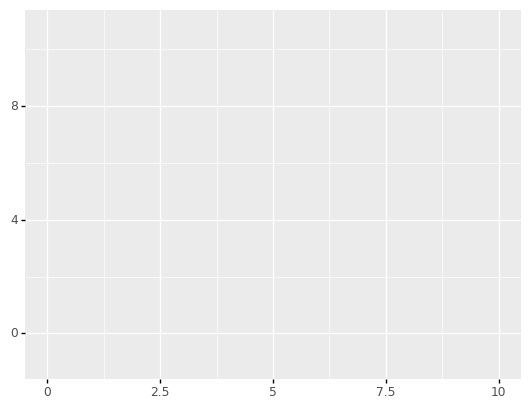

In [8]:
print(p)

All this has done is create a plot with some data and specified an aesthetic using __aes__. In this case, the __aesthetic__ associates the x axis with the X data and the y axis with the Y data. The plot exists and can be displayed. Notice that the plot is assigned to a variable. This is useful because the plot can now be modified through the variable (many plotting facilities do not support this) and thus allows you to program with plots.

Notice also that to display the plot you can use the print function.

Features are added to the plot using layers. A plot can have many layers.

### <u>Example 2 - add some points</u>

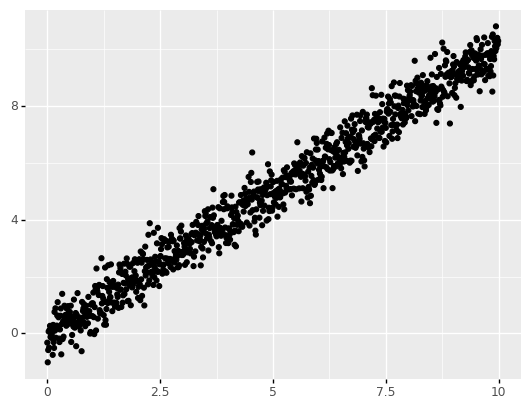

In [9]:
p1 = p + geom_point()
print(p1)

Notice how a new plot __p1__ was created from the original plot __p__ using +.

### <u>Example 3 - add some lines</u>

In [10]:
from plotnine import geom_line

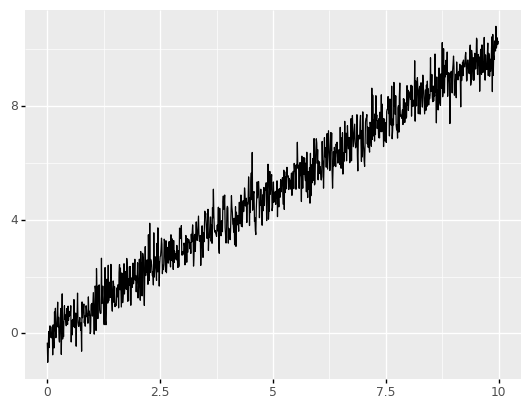

In [11]:
p2 = p + geom_line()
print(p2)

### <u>Exercise 2</u> 

Create a plot with both points and lines.

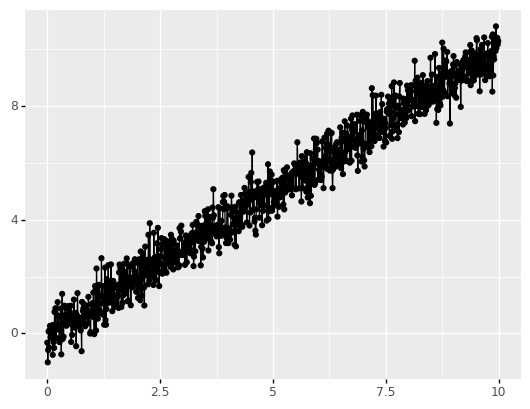

In [12]:
p3 = p + geom_line() + geom_point()
print(p3)

## Customising appearance

Each layer can be customised in a way appropriate for that layer.

### <u>Example 4</u> - Customise the lines

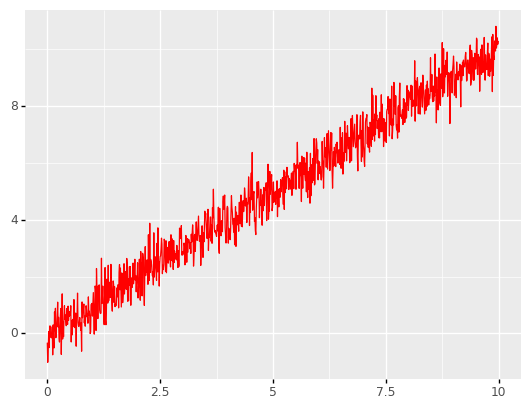

In [13]:
p2 = p + geom_line(color="red")
print(p2)

### <u>Exercise 3</u>

Experiment with the following code to change the appearance of the plot. The following is a [good source of information](https://plotnine.readthedocs.io/en/stable/).

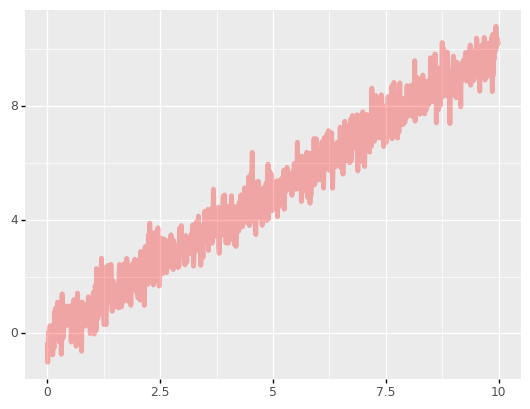

In [14]:
# p2 = p + geom_line(color="red",size=2,alpha=0.3,linetype=3)
p2 = p + geom_line(color="red",size=2,alpha=0.3,linetype="solid")
print(p2)


## Themes

The "style" of a plot can be modified and controlled through the use of themes. 

### <u>Example 5</u> - A black and white theme.

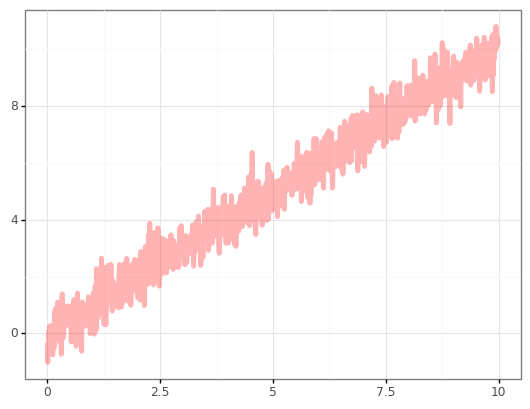

In [15]:
from plotnine.themes import theme_bw
p2 = p2 + theme_bw()
print(p2)

There are many __themes__ to choose from. You can find out about them [here](https://plotnine.readthedocs.io/en/stable/api.html#themes).

### <u>Exercise 4</u>

Experiment with some of the themes documented on the [plotnine website]() 
 

## Labels

It is easy to add labels to a plot


### <u>Example 6</u> - Adding Labels 

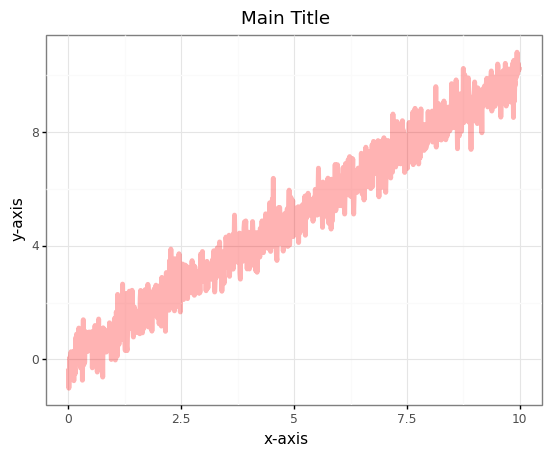

In [16]:
from plotnine.labels import labs
p2 = p2 + labs(
    title = "Main Title",
    subtitle = "a subtitle",
    caption = "A caption",
    tag = "A tag",
    x = "x-axis",
    y = "y-axis"
  )
print(p2)

## More __aesthetics__

It is possible to add aesthetics to a layer. You can think of an aesthetic as a mapping between the data and features of the layer. For example, you can make the colour change with the data.


### <u>Example 7</u> - Colour as a function of value

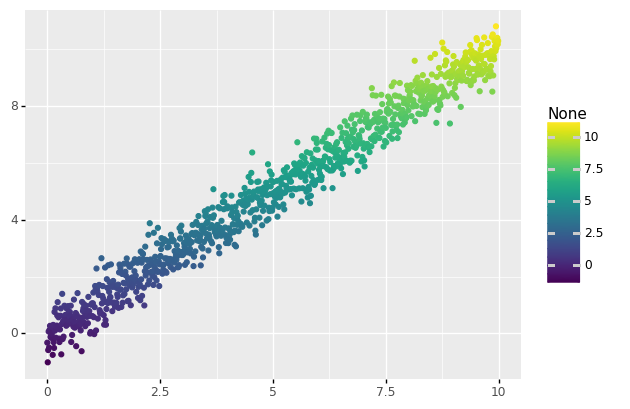

In [17]:
p3 = p + geom_point(aes(color=Y))
print(p3)

### <u>Example 8</u> - Transparency as a function of value

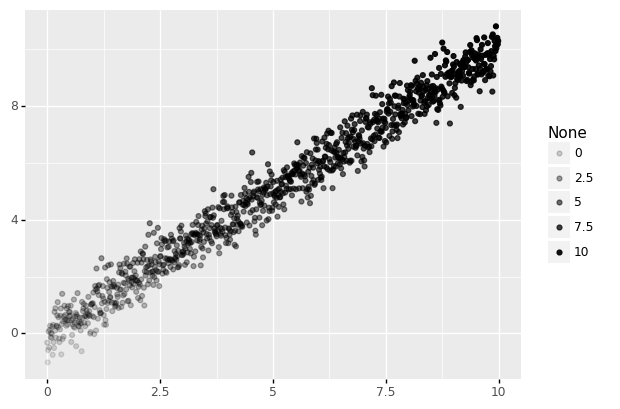

In [18]:
p3 = p + geom_point(aes(alpha=Y))
print(p3)

### <u>Example 9</u> - Smoothing the data 

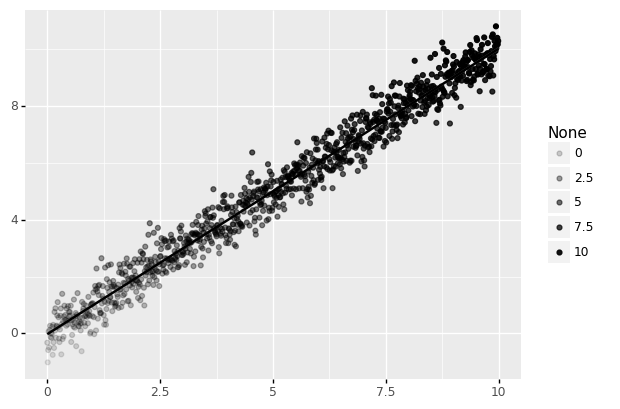

In [19]:
from plotnine import geom_smooth
p3 = p + geom_point(aes(alpha=Y)) + geom_smooth()
print(p3)

## Plot types

There are lots of different plot types. A good way to find out about them is look through the some of the online galleries. A good starting point for a wide range of examples with code and data is the [R graph library](https://www.r-graph-gallery.com/). I have picked a few and added them as examples.

In [20]:
#### data

In [21]:
xa = np.random.normal(np.ones(20000)*10,1.2)
xb = np.random.normal(np.ones(20000)*14.5,1.2)
xc = np.random.normal(np.ones(20000)*9.5,1.2)
X = np.hstack([xa,xb,xc])
ya = np.random.normal(np.ones(20000)*10,1.2)
yb = np.random.normal(np.ones(20000)*14.5,1.2)
yc = np.random.normal(np.ones(20000)*15.5,1.2)
Y = np.hstack([ya,yb,yc])

df = pd.DataFrame({"X" : X,"Y" : Y})

df

,X,Y
0,9.473016,8.865034
1,10.598378,12.572352
2,11.587896,8.086029
3,10.286138,10.322681
4,9.658781,9.805393
...,...,...
59995,9.550812,14.269954
59996,8.405688,16.876650
59997,10.249890,16.310486
59998,11.144654,16.239912


### <u>Example 10</u> - Simple contour plot

In [24]:
from plotnine import geom_density_2d
p = ggplot(df,aes(x=X,y=Y))
p1 = p + geom_density_2d()
print(p1)

/home/grosedj/python-envs/STOR-601/env/lib/python3.9/site-packages/numpy/core/shape_base.py:121: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 0 and the array at index 2 has size 3

In [ ]:
from plotnine import stat_density_2d
#p2 <- p + stat_density_2d(aes(fill='..level..'), geom='polygon')
p2 = p + stat_density_2d(aes(fill='..level..'),geom='polygon')
print(p2)

In [ ]:
from plotnine import scale_x_continuous,scale_y_continuous
from plotnine.themes.themeable import legend_position
from plotnine.themes import theme
p4 = p + stat_density_2d(aes(fill='..density..'), geom='raster', contour=False)
p4 = p4 + scale_x_continuous(expand = (0, 0))
p4 = p4 + scale_y_continuous(expand = (0, 0)) 
p4 = p4 +  theme(legend_position='none')
print(p4)

In [ ]:
blob = dict()
blob[(1,2,3,4)] = 6